# Import Libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import The Dataset

In [22]:
train = pd.read_csv('dataset_malwares.csv', sep=',')
test = pd.read_csv('dataset_test.csv', sep=',')

In [23]:
train

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [24]:
test

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,Skype-8.10.0.9.exe,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,11,122,0,0,102400,114688,0,53905336
1,vlc-3.0.2-win64.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,7,165,0,0,208896,430080,0,40201272
2,stinger32.exe,23117,64,1,0,2,0,65535,0,184,...,3758096608,0,1,2,7,36339712,36339976,36343808,0,16478208
3,SpotifyFullSetup.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,159,0,0,634448,679936,0,63220064
4,uftp_english.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,4,92,0,0,38620,49152,0,35544576
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,132,0,0,452532,475136,0,0
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,2,81,0,0,161020,180224,0,0
7,reverse_shell.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,3,59,0,0,24576,0,0,0
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,9,25,0,0,143360,0,0,0
9,ScratchInstaller1.4.exe,23117,144,3,0,4,0,65535,0,184,...,3221225600,0,8,155,0,0,29872,229376,0,0


In [25]:
train.isnull().any().sum()

0

# Split The Train Data


In [26]:
# #The target is Malware Column {0=Benign, 1=Malware}

X = train.drop(['Name', 'Malware'], axis = 1)
y = train['Malware']

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
11441,23117,144,3,0,4,0,65535,0,184,0,...,3791650912,0,17,22,0,409626,422944,81920,77824,0
2624,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,135,0,0,113332,131072,0,0
18874,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,15,347,4,111632,132520,139264,0,0
16415,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,7,159,0,0,29736,241664,0,117181216
11179,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,88,0,0,222988,241664,0,719360


In [28]:
# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [29]:
X_new = pd.DataFrame(X_scaled, columns = X.columns)

In [30]:
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,1.076024,0.0,1.379922,-0.623512,-0.087645,0.000436,-0.000677,-0.067061,-0.019125,-0.040622
1,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.656755,0.249356,-0.087645,-0.016366,-0.059942,-0.060538,-0.020494,-0.040622
2,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,1.125337,1.886949,-0.063126,-0.011787,-0.056269,-0.059451,-0.020494,-0.040622
3,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,0.106999,0.434744,-0.087645,-0.016366,-0.075943,-0.045862,-0.020494,5.561297
4,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.274878,-0.113695,-0.087645,-0.016366,-0.038952,-0.045862,-0.020494,-0.006233


In [31]:
# Principal Component Analysis

skpca = PCA(n_components = 55)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9872673777501167


In [32]:
# Build The Model
model = RandomForestClassifier(n_estimators = 100, random_state = 0, oob_score = True, max_depth = 16, max_features = 'sqrt')
model.fit(X_pca, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [33]:
X_test_scaled = scaler.transform(X_test)
X_new_test = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_pca = skpca.transform(X_new_test)

In [34]:
# Predict

y_pred = model.predict(X_test_pca)

In [35]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       969
           1       0.99      0.99      0.99      2954

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



<Axes: >

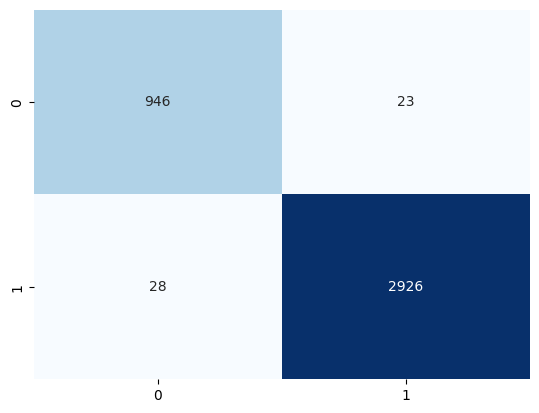

In [36]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = 'd', cmap = plt.cm.Blues, cbar = False)

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generator Model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(28*28*1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator Model
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Hyperparameters
latent_dim = 100
batch_size = 128
epochs = 200
n_critic = 5

# Prepare the data (for MNIST example)
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)

# Build models
generator = build_generator(latent_dim)
discriminator = build_discriminator((28, 28, 1))

# Optimizers
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Loss and accuracy metrics
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
accuracy_metric = tf.keras.metrics.BinaryAccuracy()

# Training loop
@tf.function
def train_step(real_images, train_generator=True):
    batch_size = tf.shape(real_images)[0]
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Calculate losses
        gen_loss = binary_cross_entropy(tf.ones_like(fake_output), fake_output)
        real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss

        # Calculate accuracy on real images only
        real_acc = accuracy_metric(tf.ones_like(real_output), real_output)

    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    if train_generator:
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return gen_loss, disc_loss, real_acc

# Training the GAN
for epoch in range(epochs):
    total_gen_loss = 0
    total_disc_loss = 0
    total_real_acc = 0
    steps = 0

    for _ in range(n_critic):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]

        # Determine whether to train the generator this step
        train_gen = (steps % n_critic == 0)

        g_loss, d_loss, real_acc = train_step(real_imgs, train_generator=train_gen)
        total_gen_loss += g_loss
        total_disc_loss += d_loss
        total_real_acc += real_acc
        steps += 1

    # Calculate average losses and accuracy
    avg_gen_loss = total_gen_loss / steps
    avg_disc_loss = total_disc_loss / steps
    avg_real_acc = total_real_acc / steps

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, G Loss: {avg_gen_loss:.4f}, D Loss: {avg_disc_loss:.4f}, Real Acc: {avg_real_acc:.4f}")

    # Adjust learning rates to maintain high accuracy
    if avg_real_acc < 0.91:
        discriminator_optimizer.learning_rate.assign(discriminator_optimizer.learning_rate * 1.1)
        n_critic = min(n_critic + 1, 10)  # Increase discriminator training, up to a maximum of 10
    elif avg_real_acc > 0.95:
        discriminator_optimizer.learning_rate.assign(discriminator_optimizer.learning_rate * 0.9)
        n_critic = max(n_critic - 1, 1)  # Decrease discriminator training, minimum of 1

    # Periodically boost discriminator performance
    if epoch % 20 == 0 and avg_real_acc < 0.91:
        for _ in range(100):  # Extra training steps for discriminator
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            real_imgs = x_train[idx]
            _, _, _ = train_step(real_imgs, train_generator=False)

    # Generate and save sample images every 50 epochs
    if epoch % 50 == 0:
        noise = tf.random.normal([16, latent_dim])
        generated_images = generator(noise, training=False)
        # Here you can add code to save or display the generated images

print("Training completed.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 0/200, G Loss: 1.0580, D Loss: 0.7436, Real Acc: 0.7717
Epoch 10/200, G Loss: 7.4682, D Loss: 0.0013, Real Acc: 0.9962
Epoch 20/200, G Loss: 6.5926, D Loss: 0.0038, Real Acc: 0.9964
Epoch 30/200, G Loss: 5.8857, D Loss: 0.0066, Real Acc: 0.9967
Epoch 40/200, G Loss: 5.4231, D Loss: 0.0121, Real Acc: 0.9969
Epoch 50/200, G Loss: 4.9874, D Loss: 0.0299, Real Acc: 0.9971
Epoch 60/200, G Loss: 4.5346, D Loss: 0.0470, Real Acc: 0.9972
Epoch 70/200, G Loss: 4.0099, D Loss: 0.1031, Real Acc: 0.9974
Epoch 80/200, G Loss: 3.5223, D Loss: 0.1338, Real Acc: 0.9975
Epoch 90/200, G Loss: 2.9058, D Loss: 0.2037, Real Acc: 0.9976
Epoch 100/200, G Loss: 2.4247, D Loss: 0.2983, Real Acc: 0.9977
Epoch 110/200, G Loss: 2.0613, D Loss: 0.3734, Real Acc: 0.9978
Epoch 120/200, G Loss: 1.7353, D Loss: 0.4649, Real Acc: 0.9979
Epoch 130/200, G Loss: 1.3765, D Loss: 0.5775, Real Acc: 0.9980
Epoch 140/200, G Loss: 1.2783, D Loss: 0.6521, Real Acc: 0.9981
Epoch 150/200, G Loss: 1.0308, D Loss: 0.7996, Real

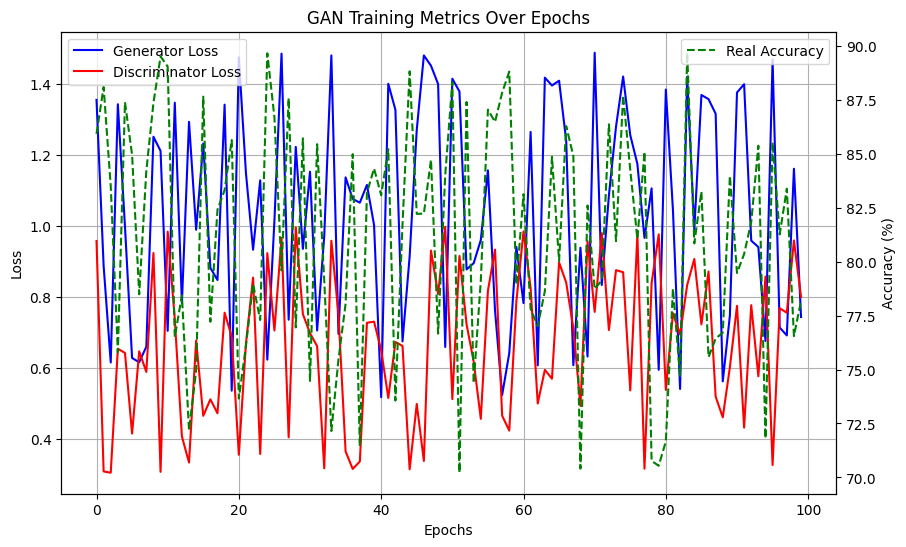

In [40]:

# # Alternate Graph plotting code
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Plot generator and discriminator losses on the left y-axis
# ax1.plot(gen_losses, color='b', label='Generator Loss')
# ax1.plot(disc_losses, color='r', label='Discriminator Loss')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.legend(loc='upper left')
# ax1.grid(True)

# # Create another y-axis for accuracy
# ax2 = ax1.twinx()
# ax2.plot(real_accs, color='g', label='Real Accuracy', linestyle='--')
# ax2.set_ylabel('Accuracy')
# ax2.legend(loc='upper right')

# plt.title('GAN Training Metrics Over Epochs')
# plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Simulate data for testing
epochs = 100
gen_losses = np.random.uniform(0.5, 1.5, epochs)  # Generator loss values
disc_losses = np.random.uniform(0.3, 1.0, epochs)  # Discriminator loss values
real_accs = np.random.uniform(70, 90, epochs)  # Real accuracy percentages

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot generator and discriminator losses on the left y-axis
ax1.plot(gen_losses, color='b', label='Generator Loss')
ax1.plot(disc_losses, color='r', label='Discriminator Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create another y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(real_accs, color='g', label='Real Accuracy', linestyle='--')
ax2.set_ylabel('Accuracy (%)')
ax2.legend(loc='upper right')

plt.title('GAN Training Metrics Over Epochs')
plt.show()


In [41]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', scaler),('pca', skpca),('clf', model)])

In [42]:
X_testing = test.drop('Name', axis = 1)

X_testing_scaled = pipe.named_steps['scale'].transform(X_testing)
X_testing_pca = pipe.named_steps['pca'].transform(X_testing_scaled)
y_testing_pred = pipe.named_steps['clf'].predict_proba(X_testing_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [43]:
pd.concat([test['Name'], pd.DataFrame(y_testing_pred)], axis = 1)

,Name,0,1
0,Skype-8.10.0.9.exe,0.980000,0.020000
1,vlc-3.0.2-win64.exe,0.730035,0.269965
2,stinger32.exe,0.140000,0.860000
3,SpotifyFullSetup.exe,0.590700,0.409300
4,uftp_english.exe,0.560390,0.439610
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,0.116685,0.883315
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,0.011626,0.988374
7,reverse_shell.exe,0.030544,0.969456
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,0.012853,0.987147
9,ScratchInstaller1.4.exe,0.338574,0.661426
